<a href="https://colab.research.google.com/github/AjinJayan/AJ/blob/master/Copy_of_CNNMNIST_Digit_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Input,Conv2D,Dense,Flatten,Dropout,MaxPool2D
from tensorflow.keras.models import Model
import time as t

In [32]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train,x_test=x_train/255.0,x_test/255.0
print("x_train.shape",x_train.shape)

x_train.shape (60000, 28, 28)


In [33]:
x_train=np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)
print(x_train.shape)

(60000, 28, 28, 1)


In [34]:
K=len(set(y_train))
print("Number of classes:",K)

Number of classes: 10


In [0]:
i=Input(shape=x_train[0].shape)
x=Conv2D(32,(3,3),strides=2,activation='relu')(i)
x=Conv2D(64,(3,3),strides=2,activation='relu')(x)
x=MaxPool2D(pool_size=(2,2),strides=2,padding='valid')(x)
x=Dropout(0.25)(x)
x=Flatten()(x)
x=Dense(128,activation='relu')(x)
x=Dropout(0.5)(x)
x=Dense(K,activation='softmax')(x)

model=Model(i,x)

In [36]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 13, 13, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 6, 6, 64)          18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               7385

In [37]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
A1=t.time()
r=model.fit(x_train,y_train,validation_split=0.20,epochs=10)
A2=t.time()
print(A2-A1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 5s 109us/sample - loss: 0.4026 - accuracy: 0.8707 - val_loss: 0.1003 - val_accuracy: 0.9677
Epoch 2/10
48000/48000 [==============================] - 5s 101us/sample - loss: 0.1714 - accuracy: 0.9474 - val_loss: 0.0718 - val_accuracy: 0.9774
Epoch 3/10
48000/48000 [==============================] - 5s 101us/sample - loss: 0.1373 - accuracy: 0.9585 - val_loss: 0.0633 - val_accuracy: 0.9805
Epoch 4/10
48000/48000 [==============================] - 5s 101us/sample - loss: 0.1139 - accuracy: 0.9638 - val_loss: 0.0538 - val_accuracy: 0.9843
Epoch 5/10
48000/48000 [==============================] - 5s 104us/sample - loss: 0.1008 - accuracy: 0.9678 - val_loss: 0.0508 - val_accuracy: 0.9847
Epoch 6/10
48000/48000 [==============================] - 5s 103us/sample - loss: 0.0935 - accuracy: 0.9712 - val_loss: 0.0499 - val_accuracy: 0.9849
Epoch 7/10
48000/48000 [==========================

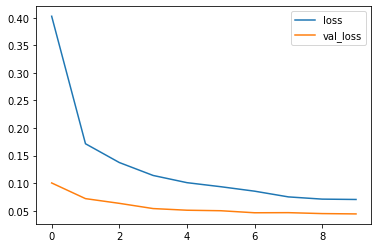

In [38]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

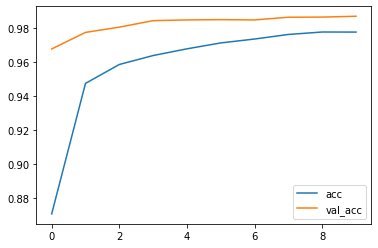

In [39]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()

In [40]:
A3=t.time()
print(model.evaluate(x_test,y_test))
A4=t.time()
print(A4-A3)

10000/10000 [==============================] - 1s 76us/sample - loss: 0.0410 - accuracy: 0.9876
[0.04101297384723075, 0.9876]
0.7872045040130615


In [41]:
predictions=model.predict([x_test])
print(np.argmax(predictions[1000]))

9
